In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
               ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

num, text = 0, 1
dataType = [num, text, num, text, num, text, text, text, text, text, num, num, num, text]

df = pd.read_csv("../dataset/adult.data", names= columnNames, sep=',')
df = df.replace(' ?', np.nan)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# d = dict()
# d["less_than"] = dict()
# d["greater_than"] = dict()
# d["less_than"]["white"] = 0
# d["less_than"]["non_white"] = 0
# d["greater_than"]["white"] = 0
# d["greater_than"]["non_white"] = 0
# for index , row in df.iterrows():
#     if row["income"].strip() == "<=50K":
#         if row["race"].strip() == "White":
#             d["less_than"]["white"] +=1
#         else:
#             d["less_than"]["non_white"]+=1
#     else:
#         if row["race"].strip() == "White":
#             d["greater_than"]["white"] +=1
#         else:
#             d["greater_than"]["non_white"]+=1
# print(d)        

In [4]:
for idx, dType in enumerate(dataType):
    if df[columnNames[idx]].isnull().sum().sum() != 0:
        if dType == text:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mode()[0].strip(), inplace=True)
        else:
            df[columnNames[idx]].fillna(df[columnNames[idx]].mean(), inplace=True)

### Use df['columnName'] to extract the column.

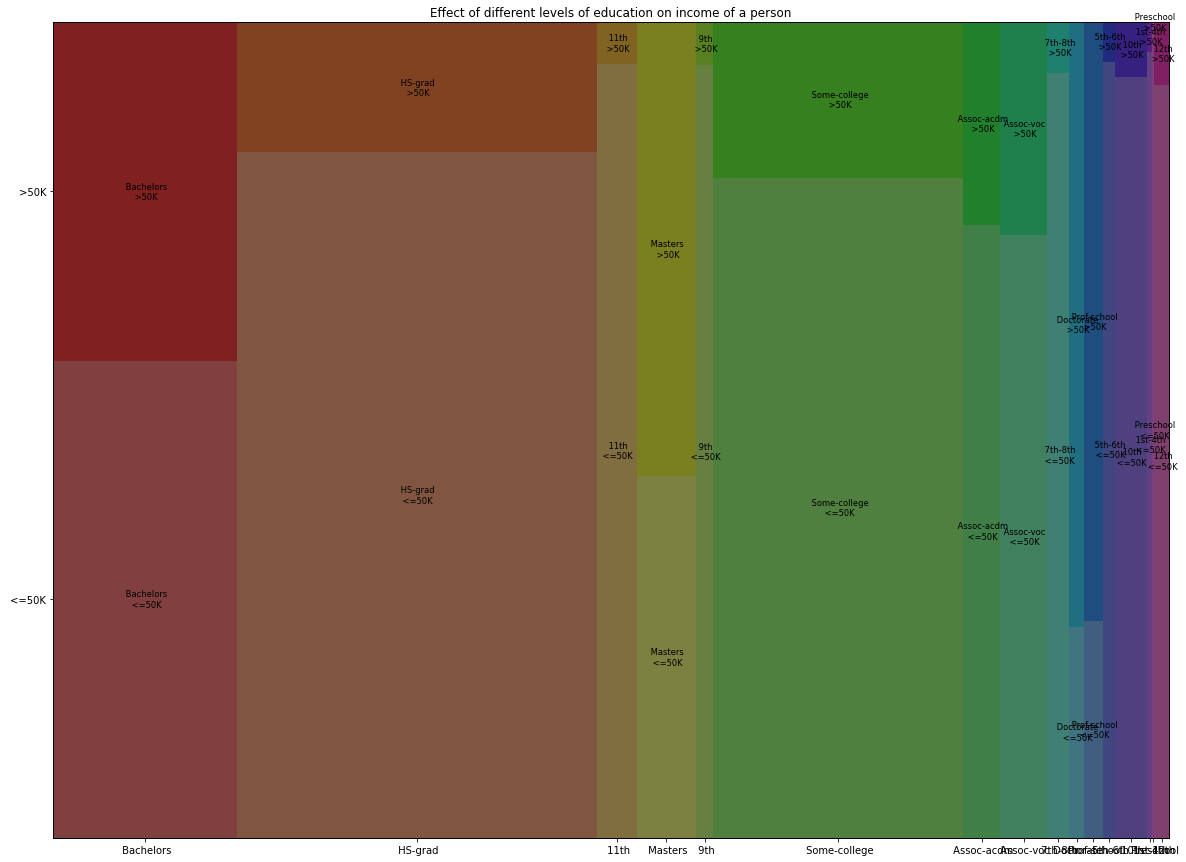

In [5]:
# NATESH TYAGI
# Univariate - 'EDUCATION'

plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(20,15))

mosaic(df, ['education', 'income'], ax=axes, axes_label=True, 
       title='Effect of different levels of education on income of a person', gap=0)
plt.show()

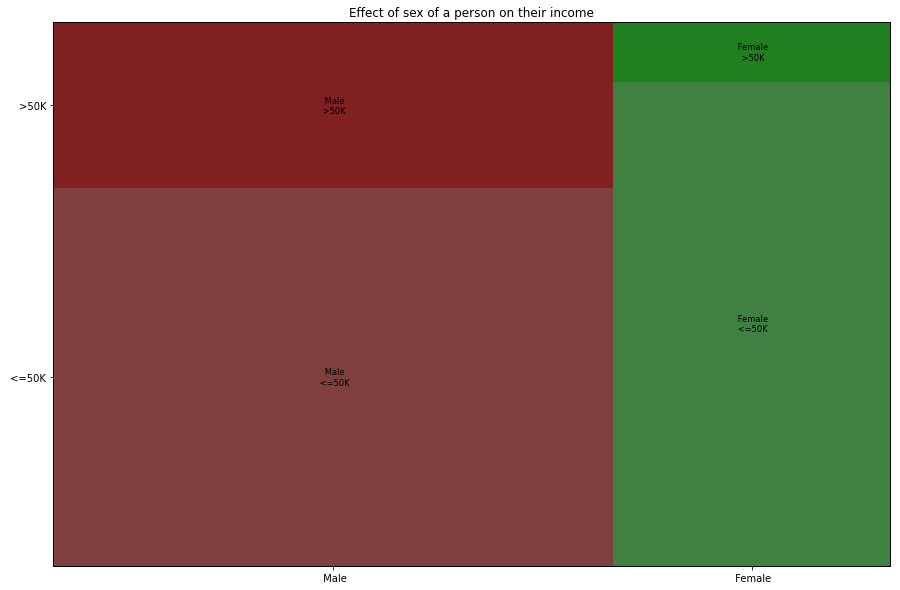

In [6]:
# NATESH TYAGI
# Univariate - 'SEX'

plt.close()

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,10))
mosaic(df, ['sex', 'income'], ax=axes, axes_label=True, gap=0,
       title='Effect of sex of a person on their income')
plt.show()

In [7]:
# IGNORE
# NATESH TYAGI
# Univariate - 'AGE'

# below50 = df.loc[df['income'] == ' <=50K', 'age']
# above50 = df.loc[df['income'] == ' >50K', 'age']

# below50Counter = Counter(below50)
# above50Counter = Counter(above50)

# above50Bins = {'17-30':0, '31-45':0, '46-60':0, '61-75':0, '76-90':0}
# below50Bins = {'17-30':0, '31-45':0, '46-60':0, '61-75':0, '76-90':0}
# for key, val in above50Counter.items():
#     if 17<=key<=30:
#         above50Bins['17-30'] += val
#     elif 31<=key<=45:
#         above50Bins['31-45'] += val
#     elif 46<=key<=60:
#         above50Bins['46-60'] += val
#     elif 61<=key<=75:
#         above50Bins['61-75'] += val
#     elif 76<=key<=90:
#         above50Bins['76-90'] += val

# for key, val in below50Counter.items():
#     if 17<=key<=30:
#         below50Bins['17-30'] += val
#     elif 31<=key<=45:
#         below50Bins['31-45'] += val
#     elif 46<=key<=60:
#         below50Bins['46-60'] += val
#     elif 61<=key<=75:
#         below50Bins['61-75'] += val
#     elif 76<=key<=90:
#         below50Bins['76-90'] += val
# print(above50Bins)
# below50Bins

(-0.65, 4.5)

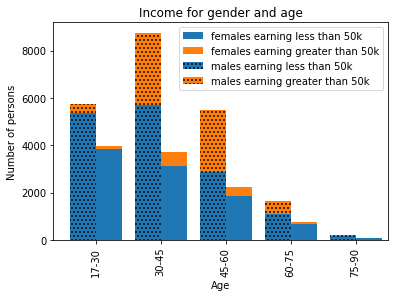

In [9]:
# age groups: 17-30, 30-45, 45-60, 60-75, 75-90
plt.close()
dict = {}

age_values = ['17-30','30-45','45-60','60-75','75-90']

for age_range in age_values:
    dict[age_range] = {"female_less_than_50k" : 0,"female_greater_than_50k" : 0,
                  "male_less_than_50k" : 0,"male_greater_than_50k" : 0}
for index, data in df.iterrows():
    key = ''
    if data["age"] >=17 and data['age']<30:
        key = age_values[0]
    elif data['age'] >=30 and data['age']<45:
        key = age_values[1]
    elif data['age'] >=45 and data['age']<60:
        key = age_values[2]
    elif data['age'] >=60 and data['age']<75:
        key = age_values[3]
    else :
        key = age_values[4]
        
    if data["sex"].strip() == "Female":
        if data["income"].strip() == '<=50K':
            dict[key]["female_less_than_50k"]+=1
        else:
            dict[key]["female_greater_than_50k"]+=1
    else:
        if data["income"].strip() == '<=50K':
            dict[key]["male_less_than_50k"]+=1
        else:
            dict[key]["male_greater_than_50k"]+=1


female_less_than_50k = []
female_greater_than_50k = []
male_less_than_50k = []
male_greater_than_50k = []
for race in age_values:
    female_less_than_50k.append(dict[race]["female_less_than_50k"])
    female_greater_than_50k.append(dict[race]["female_greater_than_50k"])
    male_less_than_50k.append(dict[race]["male_less_than_50k"])
    male_greater_than_50k.append(dict[race]["male_greater_than_50k"])

    
    
female_dataframe = pd.DataFrame({
    "females earning less than 50k":female_less_than_50k,
    "females earning greater than 50k":female_greater_than_50k,
    }, index=age_values
)

male_dataframe = pd.DataFrame({
    "males earning less than 50k":male_less_than_50k,
    "males earning greater than 50k":male_greater_than_50k,
    }, index=age_values
)


fig, ax = plt.subplots()
plt.title("Income for gender and age")
plt.ylabel("Number of persons")
plt.xlabel("Age")
female_dataframe.plot(kind="bar", stacked=True, width=0.4, 
                  ax=ax, position=0)
male_dataframe.plot(kind="bar", stacked=True, width=0.4, 
                   ax=ax, position=1, hatch='...')
ax.set_xlim(right=len(female_dataframe)-0.5)


{'Unmarried', 'Not-in-family', 'Other-relative', 'Own-child', 'Wife', 'Husband'}


(-0.65, 5.5)

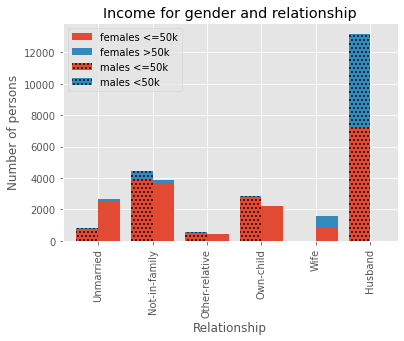

In [26]:
dict = {}
race_values = set()
race_values_set = set(list(df.relationship))
for i in race_values_set:
    race_values.add(i.strip())
print(race_values)
for race in race_values:
    dict[race] = {"female_total" : 0,"female_less_than_50k" : 0,"female_greater_than_50k" : 0,
                  "male_total" : 0,"male_less_than_50k" : 0,"male_greater_than_50k" : 0}
for index, data in df.iterrows():
    if data["sex"].strip() == "Female":
        if data["income"].strip() == '<=50K':
            dict[data["relationship"].strip()]["female_less_than_50k"]+=1
        else:
            dict[data["relationship"].strip()]["female_greater_than_50k"]+=1
        dict[data["relationship"].strip()]["female_total"]+=1
    else:
        if data["income"].strip() == '<=50K':
            dict[data["relationship"].strip()]["male_less_than_50k"]+=1
        else:
            dict[data["relationship"].strip()]["male_greater_than_50k"]+=1
        dict[data["relationship"].strip()]["male_total"]+=1
        
female = []
males = []
female_less_than_50k = []
female_greater_than_50k = []
male_less_than_50k = []
male_greater_than_50k = []
for race in race_values:
    female.append(dict[race]["female_total"])
    males.append(dict[race]["male_total"])
    female_less_than_50k.append(dict[race]["female_less_than_50k"])
    female_greater_than_50k.append(dict[race]["female_greater_than_50k"])
    male_less_than_50k.append(dict[race]["male_less_than_50k"])
    male_greater_than_50k.append(dict[race]["male_greater_than_50k"])

    
    
female_dataframe = pd.DataFrame({
    "females <=50k":female_less_than_50k,
    "females >50k":female_greater_than_50k,
    }, index=race_values
)

male_dataframe = pd.DataFrame({
    "males <=50k":male_less_than_50k,
    "males <50k":male_greater_than_50k,
    }, index=race_values
)

plt.style.use('ggplot')
fig, ax = plt.subplots()
plt.title("Income for gender and relationship")
plt.ylabel("Number of persons")
plt.xlabel("Relationship")
female_dataframe.plot(kind="bar", stacked=True, width=0.4, 
                  ax=ax, position=0)
male_dataframe.plot(kind="bar", stacked=True, width=0.4, 
                   ax=ax, position=1, hatch='...')
ax.set_xlim(right=len(female_dataframe)-0.5)